# Init

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from aspire.BlocksTask import set_blocks_env

from TaskPlanner import set_experiment_env

set_blocks_env()
set_experiment_env()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


# Load Data

In [2]:
# path = "/home/james/EROM/data/EROM-Memories_11-06-2024_18-09-37.pkl"
# path = "data/EROM-Memories_11-07-2024_17-59-35.pkl" 
# path = "data/EROM-Memories_11-12-2024_16-54-59.pkl" 
# path = "data/EROM-Memories_12-14-2024_18-37-24.pkl"
# path = "data/EROM-Memories_12-14-2024_19-30-14.pkl"
path = "data/EROM-Memories_12-14-2024_19-47-38.pkl"
data = list()
with open( path, 'rb' ) as f:
    data = pickle.load( f )

# Inspect Data

"step: <class 'list'>"
"camera: <class 'numpy.ndarray'>"
"meta: ['input', 'hits']"
<class 'dict'>
['input', 'hits']
a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


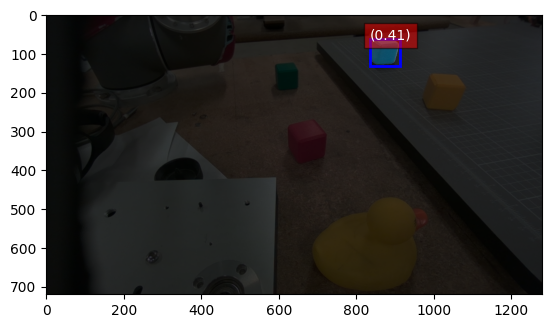

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


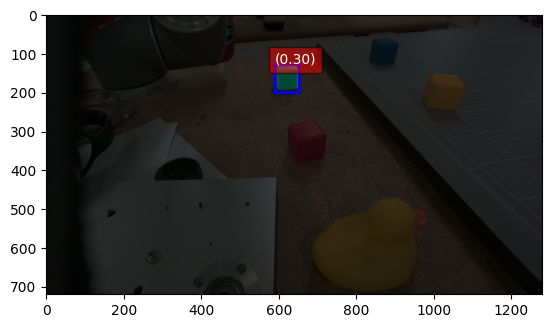

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


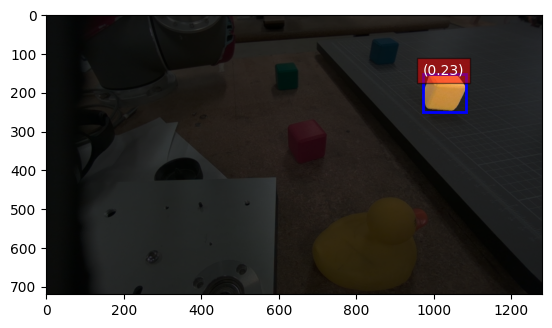

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


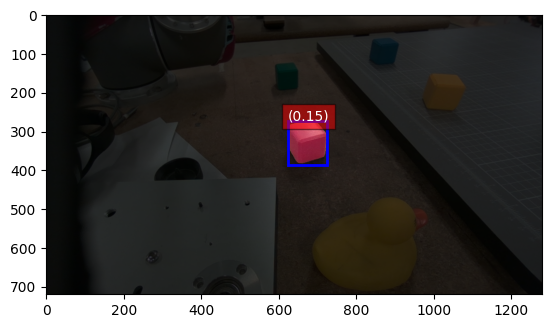

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


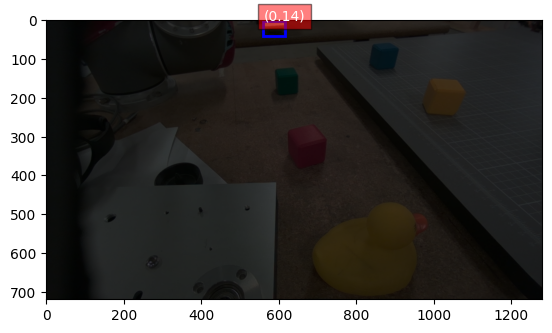

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


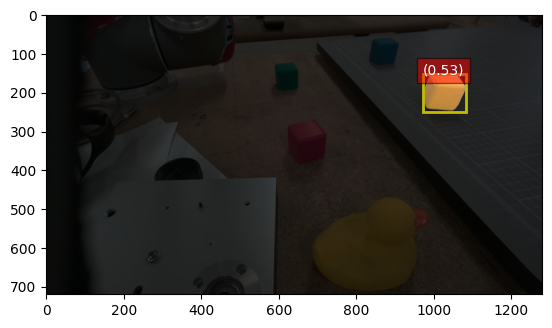

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


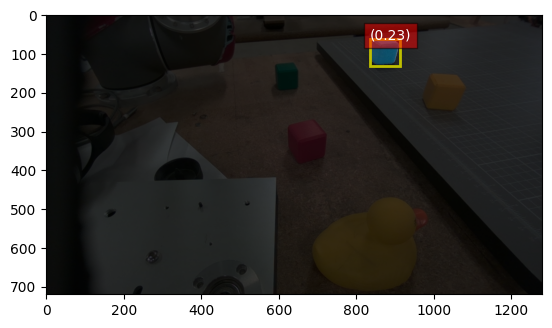

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


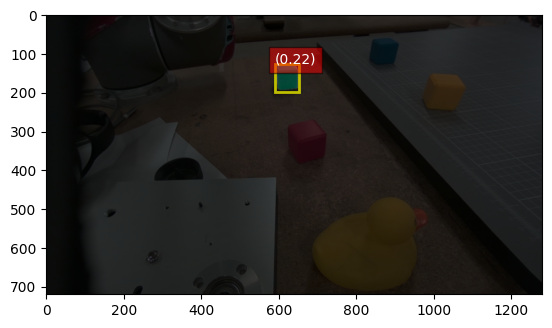

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


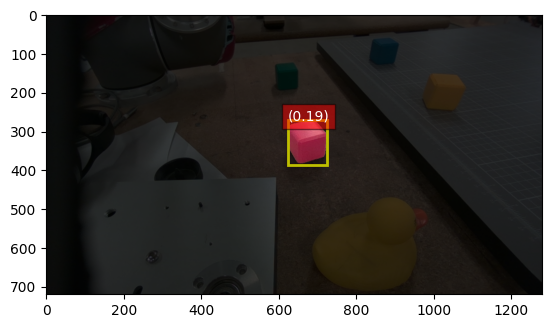

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


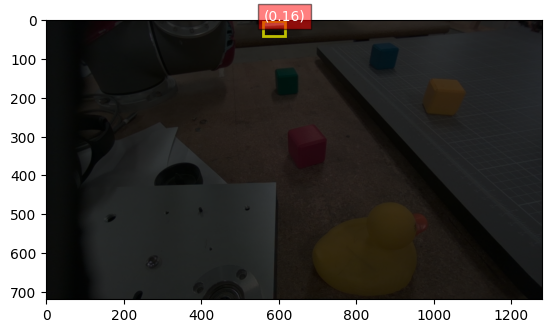

a photo of a green block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


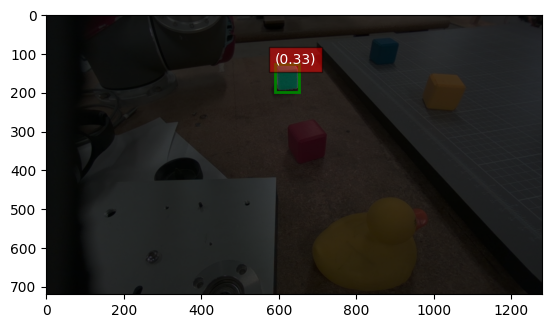

a photo of a green block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


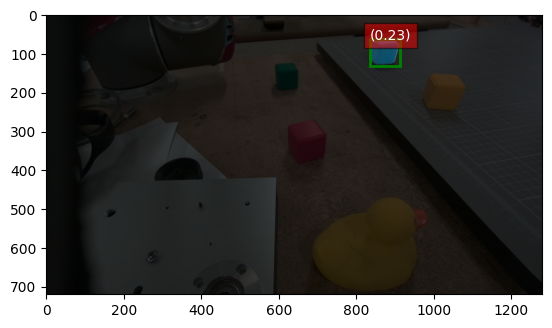

a photo of a green block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


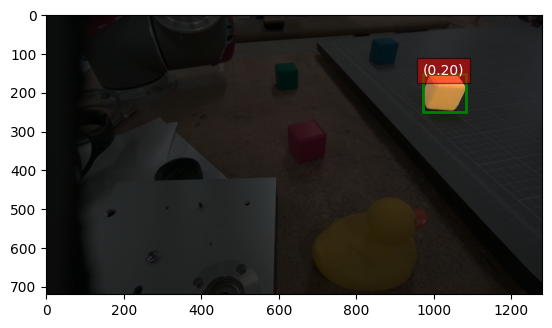

a photo of a green block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


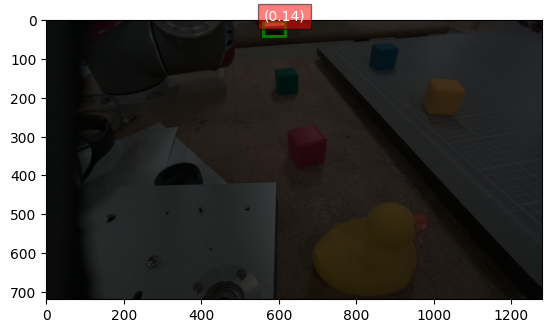

a photo of a green block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


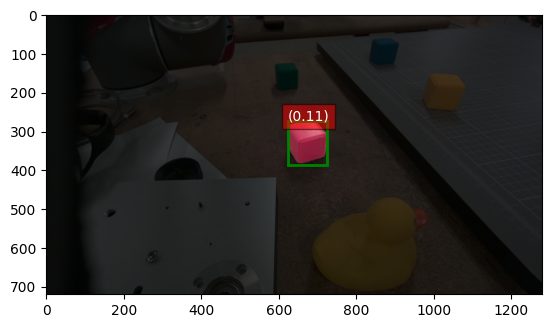

"memory: ['scan']"
"symbols: <class 'list'>"
"step: <class 'list'>"
"camera: <class 'numpy.ndarray'>"
"meta: ['input', 'hits']"
<class 'dict'>
['input', 'hits']
a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


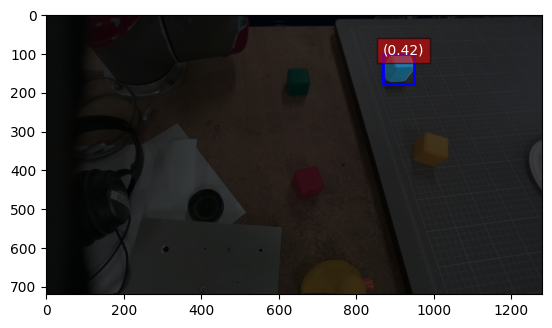

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


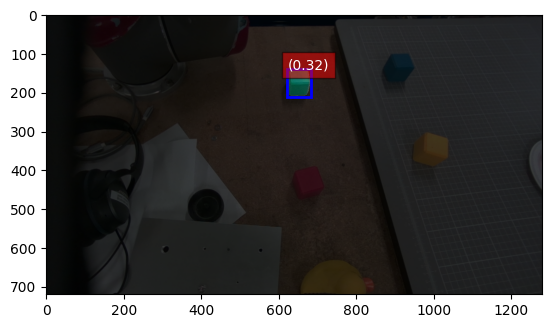

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


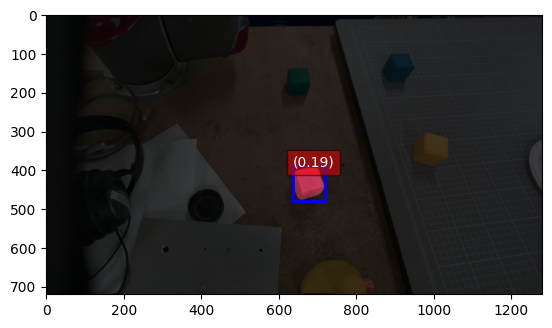

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


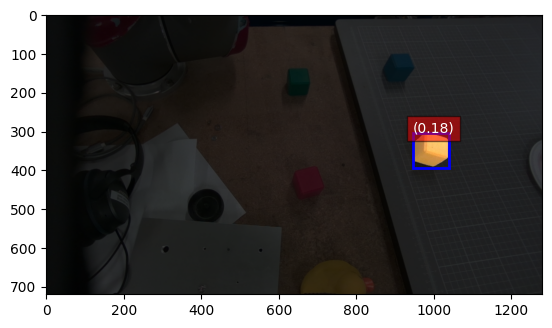

a photo of a blue block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


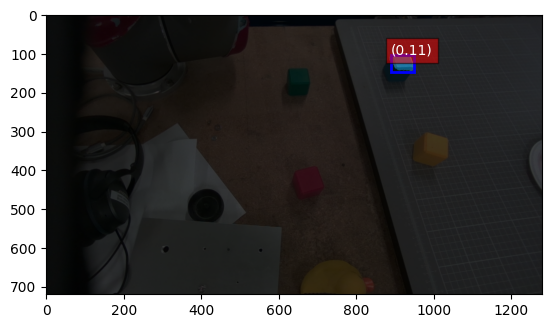

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


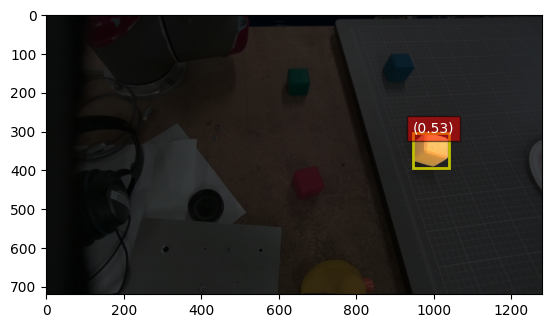

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)
(720, 1280, 3)


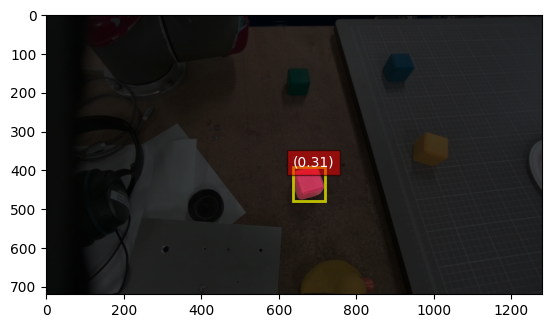

a photo of a yellow block,img: (720, 1280, 3), msk: (720, 1280)


KeyboardInterrupt: 

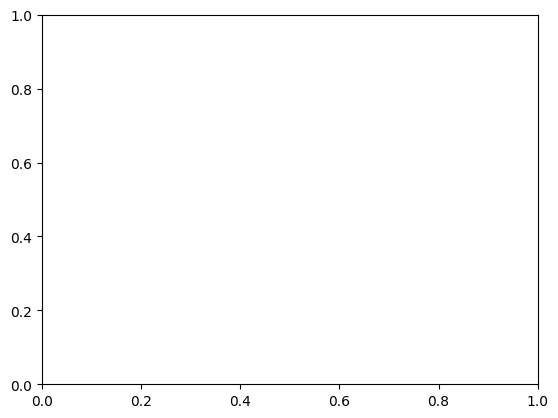

In [3]:
from pprint import pprint

import matplotlib.patches as patches

clrDct = {
    'blu' : 'blue',
    'grn' : 'green',
    'ylw' : 'yellow',
}


for i, datum in enumerate( data ):

    try:
        pprint( f"{datum['msg']}: {list(datum['data'].keys())}" )
    except Exception:
        pprint( f"{datum['msg']}: {type(datum['data'])}" )

    if datum['msg'] == 'meta':
    # if datum['msg'] == 'ObsMeta':
        
        # pprint( item )

        # for item in datum['data']['hits']:

        print( type( datum['data'] ) )    
        print( list( datum['data'].keys() ) )

        topHit = None
        topSco = 0.00

        
        
        for hit in datum['data']['hits']:

            # Create a figure and axes
            fig, ax = plt.subplots()
        
            # Display the image
            img = datum['data']['input'][ hit['shotID'] ]['image'].copy()
            
            # if (hit['score'] > 0.100) and (hit['score'] > topSco):
            #     topSco = hit['score']
            #     topHit = hit

            # hit = topHit
            print(hit['query'],end=',')
            
            x      = hit['bbox'][0]
            y      = hit['bbox'][1]
            width  = hit['bbox'][2] - x
            height = hit['bbox'][3] - y

            if 'mask' in hit:
            
                msk = hit['mask'].copy()
                # msk[msk>0.005,msk>0.005] = 1.0
                
                print( f"img: {img.shape}, msk: {msk.shape}" )
    
                for i in range( img.shape[0] ):
                    for j in range( img.shape[1] ):
                        for k in range( img.shape[2] ):
                            if not (msk[i,j] > 0.001):
                                img[i,j,k] *= 0.25
                            # img[i,j,k] -= img[i,j,k]*(1.0 - msk[i,j])*0.75
                            # 
                            
            
            # for i in range(3):
            #     img[msk>0.005,msk>0.005,i] += 0.25
            ax.imshow( img )
            print( img.shape )

            # Create a Rectangle patch
            rect = patches.Rectangle( (x, y), width, height, linewidth=2, 
                                      edgecolor = hit['abbrv'][:1], 
                                      facecolor = 'none')
            
            # Add the patch to the axes
            ax.add_patch( rect )
            

            # Add score and label text
            text = f"({hit['score']:.2f})"
            ax.text(x, y, text, color='white', bbox=dict(facecolor='red', alpha=0.5))
            
            plt.show()

In [ ]:
# FIXME: WHAT IF THE BOX INCLUDES POINTS FROM AN OBJECT ON TOP? HOW TO SUBTRACT?
# GET PCD AND INSPECT
# Maybe send it to the box that matches the color the most
